In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [26]:
torch.set_grad_enabled(True)
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

    def forward(self, t):
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)

        return t

    def __repr__(self):
        return "Bunny Kitten"

In [30]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=10,shuffle=True)

In [31]:
network = Network()

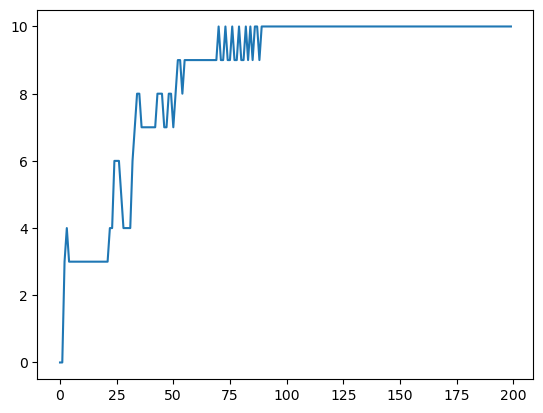

In [32]:
batch = next(iter(train_loader))
images, labels = batch
number_run = 200
holdall = np.zeros(number_run)
for I in range(number_run):
    preds = network(images)
    loss = F.cross_entropy(preds, labels)
    holdall[I] = get_num_correct(preds, labels)
    loss.backward() # Calculating the gradients
    optimizer = optim.Adam(network.parameters(), lr=0.001)
    optimizer.step()

plt.plot(holdall)
plt.show()